In [17]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [31]:
PROJECT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_DIR)
DATA_DIR = os.path.join(PROJECT_DIR, 'data')
RESOURCES_DIR = os.path.join(PROJECT_DIR, 'resources')
sex = 'female'
PROCESSED_DIR = os.path.join(DATA_DIR, f'processed/{sex}_chinese_hc_cortical_thick_centile_results')

In [32]:
variable = 'zscore'
z_scores_df = pd.read_csv(os.path.join(PROCESSED_DIR, f'{variable}_CorticalThickness_{sex}.csv'))
variable = 'RMSE'
rmse_series = pd.read_csv(os.path.join(PROCESSED_DIR, f'{variable}_CorticalThickness_{sex}.csv'))
variable = 'Corr'
corr_series = pd.read_csv(os.path.join(PROCESSED_DIR, f'{variable}_CorticalThickness_{sex}.csv'))

In [33]:
from scripts.utils import prepare_lut, rename_to_fs_lut_labels, rename_to_fs_lut_region
lut_df = prepare_lut()
z_scores_df = rename_to_fs_lut_region(z_scores_df, lut_df)
rmse_series = rename_to_fs_lut_region(rmse_series, lut_df)
corr_series = rename_to_fs_lut_region(corr_series, lut_df)

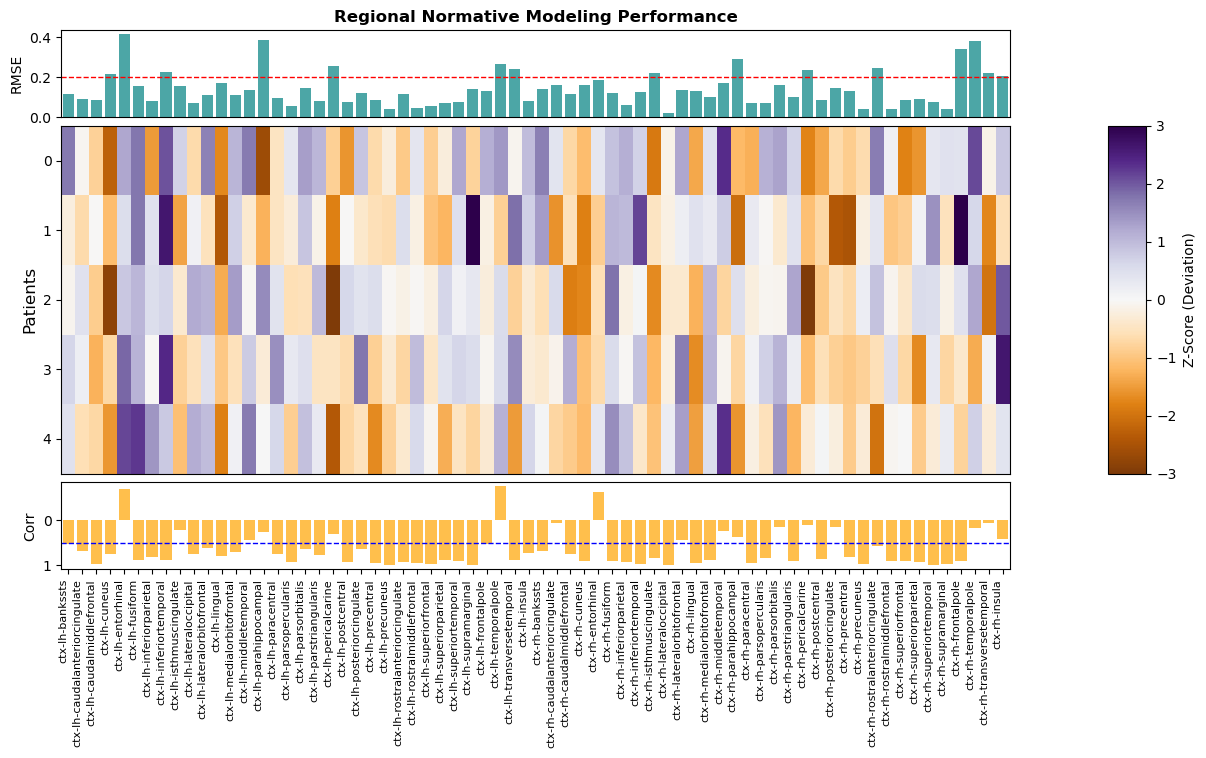

In [34]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

# --- 1. Prepare your data ---
# Assume:
# z_scores_df: rows=patients, cols=regions
# rmse_series: index=regions, values=RMSE
# corr_series: index=regions, values=Correlation

# IMPORTANT: Ensure all data follow the exact same region order
regions = z_scores_df.columns
rmse_vals = rmse_series[regions].values[0]
corr_vals = corr_series[regions].values[0]

# --- 2. Create the Layout ---
fig = plt.figure(figsize=(14, 7))
# Create a grid: 3 rows (top bar, heatmap, bottom bar) and 2 columns (plot, colorbar)
gs = gridspec.GridSpec(3, 2, height_ratios=[1.5, 6, 1.5], width_ratios=[25, 1], hspace=0.05)

ax_rmse = plt.subplot(gs[0, 0])
ax_heat = plt.subplot(gs[1, 0], sharex=ax_rmse)
ax_corr = plt.subplot(gs[2, 0], sharex=ax_rmse)
ax_cbar = plt.subplot(gs[1, 1])

# --- 3. Top Plot: RMSE ---
ax_rmse.bar(regions, rmse_vals, color='teal', alpha=0.7)
ax_rmse.axhline(y=0.2, color='red', linestyle='--', linewidth=1, label='Threshold (0.2)') # <--- Add this
ax_rmse.set_ylabel('RMSE', fontsize=10)
ax_rmse.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax_rmse.set_title('Regional Normative Modeling Performance', fontweight='bold')


# --- 4. Middle Plot: Heatmap ---
im = ax_heat.imshow(z_scores_df, cmap='PuOr', aspect='auto', vmin=-3, vmax=3)
ax_heat.set_ylabel('Patients', fontsize=12)
ax_heat.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# --- 5. Bottom Plot: Correlation (Specular) ---
ax_corr.bar(regions, corr_vals, color='orange', alpha=0.7)
ax_corr.axhline(y=0.5, color='blue', linestyle='--', linewidth=1, label='Threshold (0.5)')
ax_corr.set_ylabel('Corr', fontsize=10)
ax_corr.invert_yaxis() 

# Use the axis-specific method for reliable rotation and alignment
ax_corr.set_xticks(range(len(regions)))
ax_corr.set_xticklabels(regions, rotation=90, ha='right', fontsize=8)

# --- 6. Colorbar ---
plt.colorbar(im, cax=ax_cbar, label='Z-Score (Deviation)')

plt.show()